# **Visualisation de la Loss Function de réseaux de neurones**




1. [Introduction](#sec1)
2. [Première tentative de visualisation](#sec2)
3. [Visualiser une fonction de n variables](#sec3)
4. [Application aux réseaux de neurones profonds](#sec4)
5. [Learning the weights of a neural network (regression case)](#sec5)
6. [Neural networks for classification](#sec6)

Ce notebook a été conçu pour **Google Colab**. Exécutez cette ligne pour impoter les fichiers nécessaires :

In [11]:
%cd '/content/'
!git clone https://github.com/Blakant/loss_visualisation.git
%cd '/content/loss_visualisation'

/content
fatal: destination path 'loss_visualisation' already exists and is not an empty directory.
/content/loss_visualisation


# 1. <a id="sec1"></a> Introduction

Au fondement de l'apprentissage de tout réseau de neurone se trouve la minimisation de la ***Loss Function***, ou foncion de perte. En effet, la LF mesure la différence entre les prédictions d'un modèle et les valeurs réelles, et en minimisant cette différence, nous pouvons améliorer les prédictions du modèle. En utilisant des algorithmes d'optimisation tels que le gradient descent, nous pouvons ajuster les paramètres du modèle de manière à réduire la LF. Cette approche permet de rendre les prédictions du modèle de plus en plus précises au fil de l'apprentissage.

Il est possible de résumer un réseau de neurones à une fonction paramétrique $f_\theta$ où $\theta$ est le vecteur de tous les paramètres de notre réseau (poids et biais). L'apprentissage d'un réseau de neurones qui doit prédire $y$ correspond en fait à trouver le $\theta$ qui minimise la fonction suivante :
$$L(\theta) = \displaystyle \mathbb{E}_{(x,y)\sim p(x,y)} \left[ \left(f_\theta(x) - y\right)^2 \right] = \int_{x,y} \left[ \left(f_\theta(x) - y\right)^2 \right] \mathrm{d}p(x,y) $$

Les fonctions de perte les plus couramment utilisées en apprentissage profond sont la fonction de perte de croissance logistique (log loss) pour les tâches de classification binaire et la fonction de perte de croissance softmax (softmax loss) pour les tâches de classification multi-classes. Pour les tâches de régression, la fonction de perte de régression L1 (mean absolute error) et la fonction de perte de régression L2 (mean squared error) sont fréquemment utilisées.

L'apprentissage par réseaux neuronaux nécessite donc **la minimisation d'une fonction de perte non convexe de grande dimension** - une tâche difficile en théorie, mais parfois facile en pratique. De simples méthodes de descente de gradient trouvent souvent des minima globaux. Cependant, ce bon comportement n'est pas universel ; l'aptitude à la formation des réseaux neuronaux dépend fortement des choix d'architecture du réseau, mais également de nombreux autres paramètres. 

### Pourquoi vouloir visualiser les fonctions de pertes ?

Visualiser les fonctions de perte revient à représenter en 2D ou en 3D la variation de $L(\theta)$ en fonction de différents paramètres. Nous appellerons *Loss Landscape* cette visualisation. On pourra alors étudier la convexité de la fonction et voir si le minima atteint est un point précis, ou s'il correspond plutôt au fond d'une cuvette. De plus, par des méthodes de normalisations, il sera possible de comparer différents réseaux et ainsi voir l'impact de l'architecture sur le LL.
Enfin, Cela permettra de visualiser le parcours suivi par un algorithme de minimisation de la LF par descente de gradient.

<img src="loss_visualisation/doc/images/resnet56_noshort_small.jpg" width="600px"></img>

# 2. <a id="sec2"></a> Une première tentative de visualisation

Comme on a pu l'évoquer plus haut, la fonction de perte peut être une fonction à très haute dimension, d'où la difficulté de la représenter fidèlement en 3D. Pour avoir un premier aperçu des résultats que nous cherchons à obtenir, tentons tout d'abord de visualiser le LL d'une simple régression linéaire.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Génération des données

def generation_dataset(coefficient, noise_level, offset, num_samples):
    # Generate x values
    x = np.random.rand(num_samples)

    # Generate y values using the equation y = coefficient * x + noise
    y = coefficient * x + noise_level * np.random.randn(num_samples) + offset

    return x, y

coefficient = 4
noise_level = 0.5
num_samples = 50
offset = 5

X, y = generation_dataset(coefficient, noise_level, offset, num_samples)
X = X[:, np.newaxis]

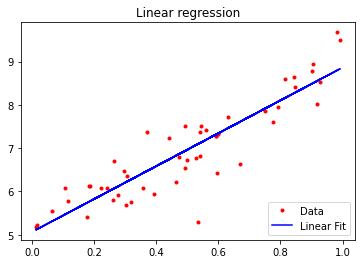

In [5]:
# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Output the coefficients
theta = [model.coef_, model.intercept_]

#plt.plot(X, model.predict(X), 'b-')
plt.plot(X, y, 'r.')
plt.plot(X, X*model.coef_ + model.intercept_, 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()

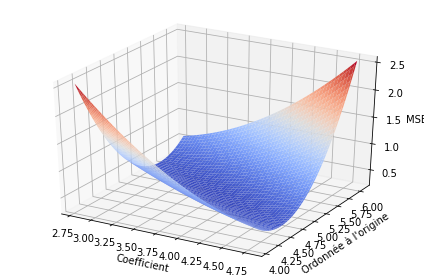

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm

grid_precision = 100

# Arrays x, y and z for data plot visualization
x_axis = np.linspace(theta[0]-1, theta[0]+1, grid_precision) # variation de a
y_axis = np.linspace(theta[1]-1, theta[1]+1, grid_precision) # variation de b
z_axis = np.zeros((grid_precision,grid_precision))

# meshgrid makes a retangular grid out of two 1-D arrays. 
x_axis2, y_axis2 = np.meshgrid(x_axis, y_axis)

for i in range(len(x_axis)):
  for j in range(len(y_axis)):
    z_axis[j,i] = mean_squared_error(y, x_axis[i]*X+y_axis[j])
  
# surface plot for x^2 + y^2 
fig = plt.figure() # creates space for a figure to be drawn 

# Uses a 3d prjection as model is supposed to be 3D
axes = fig.gca(projection ='3d')

# Plots the three dimensional data consisting of x, y and z 
axes.plot_surface(x_axis2, y_axis2, z_axis,cmap=cm.coolwarm,) 

# show command is used to visualize data plot   
axes.set_xlabel('Coefficient')
axes.set_ylabel('Ordonnée à l\'origine')
axes.set_zlabel('MSE')
plt.tight_layout()
plt.show()

Comme on peut le voir ici, ce modèle présente une fonction de perte convexe, et est donc très facilement entraînable. Toutefois, il faut garder un regard critique sur le graphique obtenu, qui reste très dépendant des données. Ainsi, en transformant $X$ et $y$ en données centrées réduites par exemple, on obtient une surface très différente de la première.

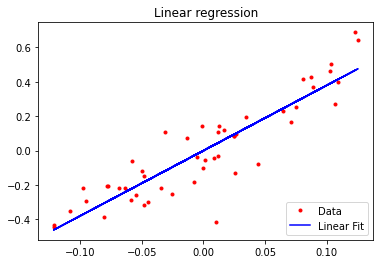

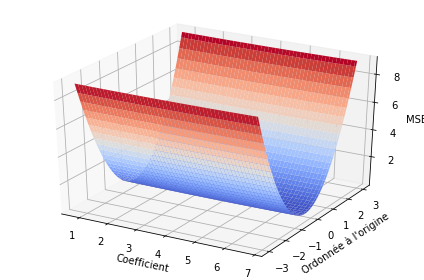

In [7]:
X_reduit = X / np.linalg.norm(X)
X_centre_reduit = X_reduit - X_reduit.mean()

y_reduit = y / np.linalg.norm(X)
y_centre_reduit = y_reduit - y_reduit.mean()

X = X_centre_reduit
y = y_centre_reduit 

model = LinearRegression()
model.fit(X, y)

# Output the coefficients
theta = [model.coef_, model.intercept_]
#plt.plot(X, model.predict(X), 'b-')
plt.plot(X, y, 'r.')
plt.plot(X, X*model.coef_ + model.intercept_, 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()

grid_precision = 100

# Arrays x, y and z for data plot visualization
x_axis = np.linspace(theta[0]-3, theta[0]+3, grid_precision) # variation de a
y_axis = np.linspace(theta[1]-3, theta[1]+3, grid_precision) # variation de b
z_axis = np.zeros((grid_precision,grid_precision))

# meshgrid makes a retangular grid out of two 1-D arrays. 
x_axis2, y_axis2 = np.meshgrid(x_axis, y_axis)

for i in range(len(x_axis)):
  for j in range(len(y_axis)):
    z_axis[j,i] = mean_squared_error(y, x_axis[i]*X+y_axis[j])
  
# surface plot for x^2 + y^2 
fig = plt.figure() # creates space for a figure to be drawn 

# Uses a 3d prjection as model is supposed to be 3D
axes = fig.gca(projection ='3d')

# Plots the three dimensional data consisting of x, y and z 
axes.plot_surface(x_axis2, y_axis2, z_axis,cmap=cm.coolwarm,) 

# show command is used to visualize data plot   
axes.set_xlabel('Coefficient')
axes.set_ylabel('Ordonnée à l\'origine')
axes.set_zlabel('MSE')
plt.tight_layout()
plt.show()

La régression linéaire est une approche simpliste. Toutefois elle permet de réaliser que la visulisation de la loss function n'est pas aisée et requiert **une attention toute particulière à l'échelle**. Ici par exemple, augmenter le coefficient de la régression linéaire d'un point n'a pas le même impact que d'augmenter l'ordonée à l'origine d'un point.

# 3. <a id="sec2"></a> Visualiser une fonction de $n$ variables

Les réseaux neuronaux sont entraînés sur un ensemble de vecteurs de caractéristiques (par exemple, des images) $\{ x_i \}$ et des labels correspondantes $\{ y_i \}$ en minimisant la loss function $L(θ) = 1/m* \sum_{i=1}^{m} l(x_i,y_i,\theta)$ où $\theta$ désigne les paramètres du réseau neuronal. La fonction $l(x_i,y_i,\theta)$ mesure la capacité du réseau de neurones avec les paramètres $\theta$ à prédire la valeur de l'échantillon, et $m$ est le nombre d'échantillons de données.
Les réseaux neuronaux contiennent de nombreux paramètres, et leurs fonctions de perte se situent donc dans un espace de très haute dimension. Malheureusement, les visualisations ne sont possibles qu'à l'aide de graphiques 1D (ligne) ou 2D (surface) de faible dimension.Il existe plusieurs méthodes pour combler cet écart de dimensionnalité.

## Approche 1D

Une façon simple de visualiser les loss functions consiste à choisir deux ensembles de paramètres $\theta$ et $\theta'$, et de tracer les valeurs de la loss function le long de la ligne reliant ces deux points. Nous pouvons paramétrer cette ligne en choisissant un paramètre scalaire $\alpha$, et en définissant la moyenne pondérée $\theta(\alpha) = (1-\alpha)\theta + \alpha\theta'$. Enfin, on trace la fonction $f(\alpha)=L(\theta(\alpha))$. 

Le choix des $\theta$ n'est pas anodin : on peut par exemple prendre deux minima locaux trouvés pour deux jeux de données d'entraînement.

### Expérimentation

Evaluer une loss function pour de nombreux paramêtres peut demander d'importantes ressources. Nous effectuerons nos premières expérimentations en faisant l'hypothèse que notre loss function est une fonction connue à 4 dimensions, **la fonction de Rastrigin**. Cette fonction est souvent utilisée pour évaluer la performance d'algorithmes d’optimisation. Voici sa définition :

$F(\vec{x}) = A\cdot{}n + \sum_{i=1}^{n}{x_{i}^{2} -
A\cdot{}\cos (\omega{}\cdot{}x_{i})} \\ \nonumber A = 10 \ ; \
\omega = 2\cdot{}\pi{} \ ; \ x_{i} \in [-5.12,5.12]$


Nous poserons $n=4$.

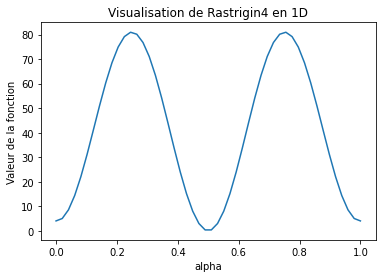

In [8]:
import numpy as np
import matplotlib.pyplot as plt

precision = 50

def rastrigin_4d(theta):
    x = theta[0]
    y = theta[1]
    z = theta[2]
    w = theta[3]

    A = 10
    return A*4 + x**2 + y**2 + z**2 + w**2 - A*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y) + np.cos(2*np.pi*z) + np.cos(2*np.pi*w))

# Sélectionnons deux theta
theta1 = np.array([-1,1,-1,1])
theta2 = np.array([1,-1,1,-1])

# Générons notre fonction f(alpha), fonction en une dimension 
alpha = np.linspace(0,1,precision)
theta_alpha = np.ndarray(shape=(4,precision))
f_alpha = np.ndarray(precision)

for i in range(precision):
  theta_alpha[:,i] = (1-alpha[i])*theta1 + alpha[i]*theta2
  f_alpha[i] = rastrigin_4d(theta_alpha[:,i])

plt.plot(alpha, f_alpha)
plt.title("Visualisation de Rastrigin4 en 1D")
plt.xlabel("alpha")
plt.ylabel("Valeur de la fonction")
plt.show()


La méthode d'interpolation linéaire 1D souffre de plusieurs faiblesses. Premièrement, il est difficile de visualiser les non-convexités à l'aide de graphiques 1D. En effet, Goodfellow et al. ont constaté que les fonctions de perte semblent manquer de minima locaux le long de la trajectoire de minimisation. 

> Ian J Goodfellow, Oriol Vinyals, and Andrew M Saxe. *Qualitatively characterizing neural network optimization problems*. In ICLR, 2015

Nous verrons plus tard, à l'aide de méthodes 2D, que certaines fonctions de perte présentent des non-convexités extrêmes, et que ces non-convexités sont corrélées à la différence de généralisation entre différentes architectures de réseau. Il est donc indispensable de les visualiser de la façon la plus exacte.


## Approche 2D

L'approche 2D se base sur la sélection d'un point central $\theta^*$ et de deux vecteurs de direction $\delta$ et $\eta$.
Il suffit alors de représenter la fonction suivante :

$$f(\alpha,\beta)=L(\theta^*+\alpha\delta+\beta\eta)$$ 

Cette approche a été utilisée dans cet article pour explorer les trajectoires de différentes méthodes de minimisation :

> Ian J Goodfellow, Oriol Vinyals, and Andrew M Saxe. *Qualitatively characterizing neural network optimization problems*. In ICLR, 2015

Elle a également été utilisée dans cet article pour montrer que différents algorithmes d'optimisation trouvent différents minima locaux dans l'espace projeté en 2D. 

> Daniel Jiwoong Im, Michael Tao, and Kristin Branson. *An empirical analysis of deep network loss surfaces*. arXiv preprint arXiv:1612.04010, 2016.

En raison de la charge de calcul que représente le tracé en 2D pour des réseaux profonds, ces méthodes aboutissent généralement à des tracés à faible résolution de petites régions qui n'ont pas rendu compte de la non-convexité complexe des surfaces de perte. Ci-dessous, nous utilisons des visualisations à haute résolution sur de grandes tranches d'espace de poids pour visualiser comment la conception du réseau affecte la structure non convexe.


### Expérimentation


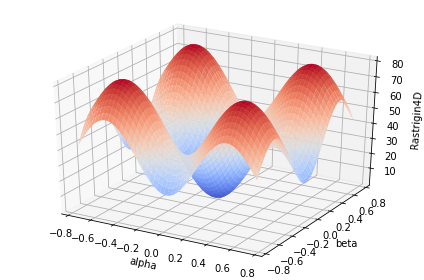

In [9]:
precision = 100
Xlim = [-0.75, 0.75]
Ylim = [-0.75, 0.75]

# Sélectionnons un theta
theta = np.array([0,0,0,0]) # l'origine est le minima global de cette fonction

# Sélectionnons deux directions orthogonales
delta = np.array([1,1,0,0]) 
eta = np.array([0,0,1,1]) 

# Générons notre fonction f(alpha), fonction en deux dimensions
alpha = np.linspace(Xlim[0],Xlim[1],precision)
beta = np.linspace(Ylim[0],Ylim[1],precision)
loss = np.zeros((precision,precision))

# meshgrid makes a retangular grid out of two 1-D arrays. 
alpha_grid, beta_grid = np.meshgrid(alpha, beta)
theta_alpha = np.ndarray(shape=(4,precision))

for i in range(len(alpha)):
  for j in range(len(beta)):
    loss[i,j] = rastrigin_4d(theta + alpha[i] * delta + beta[j] * eta)
  
# surface plot for x^2 + y^2 
fig = plt.figure() # creates space for a figure to be drawn 

# Uses a 3d prjection as model is supposed to be 3D
axes = fig.gca(projection ='3d')

# Plots the three dimensional data consisting of x, y and z 
axes.plot_surface(alpha_grid, beta_grid, loss, cmap=cm.coolwarm,) 
 
# show command is used to visualize data plot   
axes.set_xlabel('alpha')
axes.set_ylabel('beta')
axes.set_zlabel('Rastrigin4D')
plt.tight_layout()
plt.show()

Nous venons donc d'observer une fonction de dimension 4 en 2D. 
Tentons désormais d'appliquer cette méthode aux fonctions de perte de vrais réseaux.

Si vous disposez d'une (très) bonne carte graphique, je vous propose d'essayer de faire vos propres rendus. Personnellement un rendu de 100x100 points me prendrait 14,3 jours. Regardons ensemble comment utiliser des données précalculées.

Tout d'abord, clonons ce git, et accédons au dossier :

In [10]:
%cd '/content/'
!git clone https://github.com/Blakant/loss_visualisation.git
%cd '/content/loss_visualisation'

/content
fatal: destination path 'loss_visualisation' already exists and is not an empty directory.
/content/loss_visualisation


Installons ce module (l'installation prend 2 minutes) :

In [ ]:
!pip install mpi4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp38-cp38-linux_x86_64.whl size=5997339 sha256=9b29f296c5a7c4927fc7272d3f66294a7eddb9ba21a6e0fed8e584a0b4ebb562
  Stored in directory: /root/.cache/pip/wheels/f3/35/48/0b9a7076995eea5ea64a7e4bc3f0f342f453080795276264e7
Successfully built mpi4py


On peut enfin exécuter le fichier *plot_surface.py*, en prenant soin de limiter le nombre de points calculés. Sur Google Colab, un point prend environ 13 secondes à être calculé. On peut se limiter à *--x=-1:1:4 --y=-1:1:4*, bien que ces résultats n'apportent pas beaucoup d'informations...

Pour contourner ce problème, utilisons le réseau pré-entrainé ResNet avec des vecteurs $\theta$ et $\theta'$ calculés par avance.

Rank 0 use GPU 0 of 1 GPUs on 5d0f530443a5
-------------------------------------------------------------------
setup_direction
-------------------------------------------------------------------
cifar10/trained_nets/resnet56_sgd_lr=0.1_bs=128_wd=0.0005/model_300.t7_weights_xignore=biasbn_xnorm=filter.h5 is already setted up
cifar10/trained_nets/resnet56_sgd_lr=0.1_bs=128_wd=0.0005/model_300.t7_weights_xignore=biasbn_xnorm=filter.h5_[-1.0,1.0,51].h5 is already setted up
Files already downloaded and verified
Files already downloaded and verified
Computing 0 values for rank 0
Rank 0 done!  Total time: 0.00 Sync: 0.00
------------------------------------------------------------------
plot_1d_loss_err
------------------------------------------------------------------
<KeysViewHDF5 ['dir_file', 'train_acc', 'train_loss', 'xcoordinates']>
train_loss
[4.26416063e+00 4.46900595e+00 4.64530539e+00 4.63318485e+00
 4.47456204e+00 4.25950994e+00 4.02371148e+00 3.77241492e+00
 3.50316676e+00 3.20853

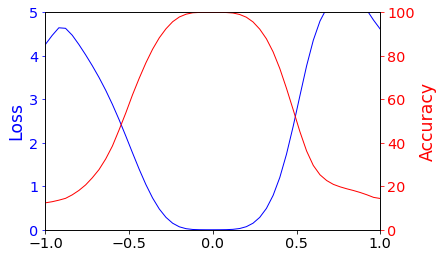

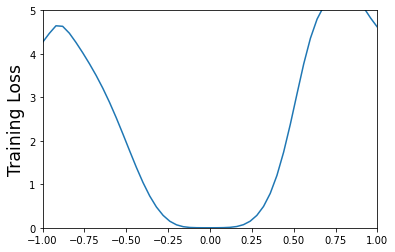

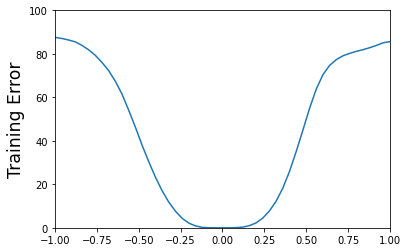

In [ ]:
%run plot_surface.py --mpi --cuda --model resnet56 --x=-1:1:51 \
--model_file cifar10/trained_nets/resnet56_sgd_lr=0.1_bs=128_wd=0.0005/model_300.t7 \
--dir_type weights --xnorm filter --xignore biasbn --plot --show

Rank 0 use GPU 0 of 1 GPUs on 19b8315ff04a
-------------------------------------------------------------------
setup_direction
-------------------------------------------------------------------
cifar10/trained_nets/resnet56_sgd_lr=0.1_bs=128_wd=0.0005/model_300.t7_weights_xignore=biasbn_xnorm=filter_yignore=biasbn_ynorm=filter.h5 is already setted up
cifar10/trained_nets/resnet56_sgd_lr=0.1_bs=128_wd=0.0005/model_300.t7_weights_xignore=biasbn_xnorm=filter_yignore=biasbn_ynorm=filter.h5_[-1.0,1.0,51]x[-1.0,1.0,51].h5 is already setted up


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10/data/cifar-10-python.tar.gz to cifar10/data
Files already downloaded and verified
Computing 0 values for rank 0
Rank 0 done!  Total time: 0.00 Sync: 0.00
------------------------------------------------------------------
plot_2d_contour
------------------------------------------------------------------
loading surface file: cifar10/trained_nets/resnet56_sgd_lr=0.1_bs=128_wd=0.0005/model_300.t7_weights_xignore=biasbn_xnorm=filter_yignore=biasbn_ynorm=filter.h5_[-1.0,1.0,51]x[-1.0,1.0,51].h5
len(xcoordinates): 51   len(ycoordinates): 51
max(train_loss) = 17.284105 	 min(train_loss) = 0.000920
[[17.28410487 14.6807087  12.98100707 ...  7.07460538  8.15200678
   9.55291281]
 [14.76114291 12.8625637  11.56407234 ...  6.50484355  7.38651368
   8.5678004 ]
 [13.0398639  11.44708546 10.30514679 ...  6.04043553  6.73240655
   7.70562032]
 ...
 [10.42274396  8.90131614  7.79317611 ...  6.90051691  7.85505704
   9.19088769]
 [12.30604725 10.43367188  9.070556   ...  7.97881572 

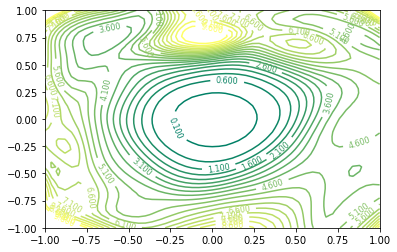

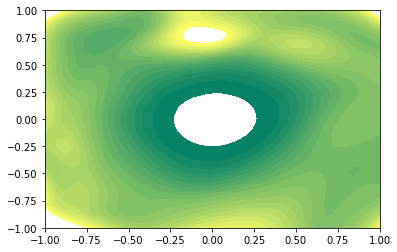

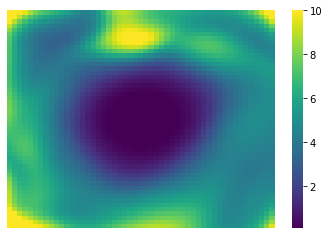

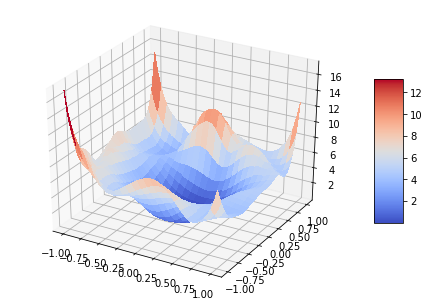

In [ ]:
%run plot_surface.py --mpi --cuda --model resnet56 --x=-1:1:51 --y=-1:1:51 \
--model_file cifar10/trained_nets/resnet56_sgd_lr=0.1_bs=128_wd=0.0005/model_300.t7 \
--dir_type weights --xnorm filter --xignore biasbn --ynorm filter --yignore biasbn  --plot --show